In [193]:
import numpy as np
import mahotas
import json
import cv2
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
from skimage.transform import resize

In [194]:
DATASET_FOLDER = "/Users/jiehyun/kaggle/input/hubmap-organ-segmentation/"
TRAIN_IMAGES = DATASET_FOLDER + "train_images"
TRAIN_ANNOT = DATASET_FOLDER + "train_annotations"
TRAIN_CSV = DATASET_FOLDER + "train.csv"
train_df = pd.read_csv(TRAIN_CSV)
binary_masks = DATASET_FOLDER + "binary_masks"

In [195]:
len(train_df['id'])

351

In [196]:
#plt.rcParams.update({'figure.max_open_warning': 0})
#plt.rcParams['figure.max_open_warning'] = 1000
plt.rc('figure', max_open_warning = 0)

In [198]:
#reference1: https://github.com/maftouni/binary_mask_from_json/blob/main/binary_mask_from_json.py
#reference2: https://www.kaggle.com/code/soymilkk/hubmap-unet

for i in range(len(train_df['id'])):
    idx = random.randint(0, len(train_df) - 1)
    img_id = train_df['id'][idx]
    img_path = os.path.join(DATASET_FOLDER, f'train_images/{img_id}.tiff')
    img = cv2.imread(img_path)
    
    with open(os.path.join(DATASET_FOLDER, f'train_annotations/{img_id}.json')) as json_file:
        data = json.load(json_file)

    x_val = []
    y_val = []
    for i in range(len(data)):
        for j in range(len(data[i])):        
            shape1_x=data[i][j][0]
            shape1_y=data[i][j][1]
            x_val.append(shape1_x)
            y_val.append(shape1_y)

    fig = plt.figure()

    # normalize the data to 0 - 1
    #plt.imshow(img.astype(np.uint8)) 
    #plt.scatter(x_val, y_val, zorder=2, color='red', marker = '.', alpha= 0.2)

    mask = np.zeros((img.shape[0],img.shape[1]))
    for i in range(len(data)):
        img2=cv2.drawContours(mask, [np.array(data[i])], -1, (255, 255, 255), -1)

    output_shape = (512, 512)
    resized_img = resize(img, output_shape)
    resized_mask = resize(img2, output_shape)

    os.chdir(binary_masks)

    #plt.imshow(img, )
    #plt.imshow(img2, alpha = 0.5)
    #plt.show()

    file_dir = os.path.join(DATASET_FOLDER, f'binary_masks/{img_id}.png')
    cv2.imwrite(file_dir, img2) 
    plt.close('all')

In [201]:
print(img2[1000:1500,1000:1500])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [202]:
img2.max()

255.0

In [203]:
img2.astype(np.bool)

/var/folders/w2/kjqd2k2x70z1qwx2jy2y7j580000gn/T/ipykernel_56204/701570927.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img2.astype(np.bool)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

/var/folders/w2/kjqd2k2x70z1qwx2jy2y7j580000gn/T/ipykernel_56204/2608287139.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(img2.astype(np.bool))


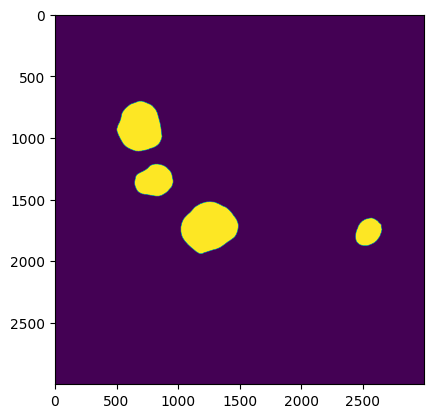

In [204]:
plt.imshow(img2.astype(np.bool))